In [3]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib


In [4]:
# load dataset
df = pd.read_excel("../data/cleaned_data/cleaned_tourism_data.xlsx")
df.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,ContinentId,RegionId,CountryId,CityId,CityName,Country,Region,Continent,AttractionTypeId,Attraction,AttractionAddress,AttractionType,VisitMode
0,3,70456,2022,10,2,640,5,5,21,163,4341,Guildford,United Kingdom,Western Europe,Europe,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Couples
1,8,7567,2022,10,4,640,5,2,8,48,464,Ontario,Canada,Northern America,America,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Friends
2,9,79069,2022,10,3,640,5,2,9,54,774,Brazil,Brazil,South America,America,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Family
3,10,31019,2022,10,3,640,3,5,17,135,583,Zurich,Switzerland,Central Europe,Europe,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Family
4,15,43611,2022,10,2,640,3,5,21,163,1396,Manchester,United Kingdom,Western Europe,Europe,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Couples


In [5]:
# predicting visitmode 
X = df.drop(columns=[
    "VisitMode",
    "VisitModeId",
    "TransactionId",
    "UserId",
    "CityId",
    "CountryId",
    "RegionId",
    "ContinentId",
    "AttractionId"
])

y = df["VisitMode"]

In [6]:
X

,VisitYear,VisitMonth,Rating,CityName,Country,Region,Continent,AttractionTypeId,Attraction,AttractionAddress,AttractionType
0,2022,10,5,Guildford,United Kingdom,Western Europe,Europe,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
1,2022,10,5,Ontario,Canada,Northern America,America,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
2,2022,10,5,Brazil,Brazil,South America,America,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
3,2022,10,3,Zurich,Switzerland,Central Europe,Europe,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
4,2022,10,3,Manchester,United Kingdom,Western Europe,Europe,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
...,...,...,...,...,...,...,...,...,...,...,...
52917,2018,9,4,Lyon,France,Western Europe,Europe,44,Yogyakarta Palace,Yogyakarta,Historic Sites
52918,2016,2,5,Bratislava Region,Slovakia,Central Europe,Europe,44,Yogyakarta Palace,Yogyakarta,Historic Sites
52919,2016,2,4,Bratislava Region,Slovakia,Central Europe,Europe,44,Yogyakarta Palace,Yogyakarta,Historic Sites
52920,2016,2,4,Bratislava Region,Slovakia,Central Europe,Europe,44,Yogyakarta Palace,Yogyakarta,Historic Sites


In [7]:
# check class balance before classification
print("Class distribution:\n", y.value_counts())

Class distribution:
 VisitMode
Couples     21617
Family      15215
Friends     10944
Solo         4523
Business      623
Name: count, dtype: int64


In [8]:
# train-test split with stratification to maintain class balance
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

In [9]:
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(include="number").columns

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

In [10]:
# logistic regression pipeline
lr_clf = Pipeline([
    ("prep", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

lr_clf.fit(X_train, y_train)

y_pred_lr = lr_clf.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.4675484175720359
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       124
           1       0.47      0.85      0.61      4324
           2       0.48      0.35      0.40      3043
           3       0.35      0.10      0.15      2189
           4       0.00      0.00      0.00       905

    accuracy                           0.47     10585
   macro avg       0.26      0.26      0.23     10585
weighted avg       0.40      0.47      0.40     10585



d:\coding\Labmentix\Tourism_Experience_Analytics\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\coding\Labmentix\Tourism_Experience_Analytics\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\coding\Labmentix\Tourism_

In [11]:
# XGBoost pipeline

xgb_clf = Pipeline([
    ("prep", preprocessor),
    ("model", XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        random_state=42,
        use_label_encoder=False,
        eval_metric="mlogloss"
    ))
])

xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

d:\coding\Labmentix\Tourism_Experience_Analytics\venv\Lib\site-packages\xgboost\training.py:200: UserWarning: [22:49:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.4896551724137931
              precision    recall  f1-score   support

           0       0.50      0.02      0.03       124
           1       0.49      0.84      0.62      4324
           2       0.55      0.38      0.45      3043
           3       0.38      0.17      0.23      2189
           4       0.56      0.03      0.06       905

    accuracy                           0.49     10585
   macro avg       0.50      0.29      0.28     10585
weighted avg       0.49      0.49      0.43     10585



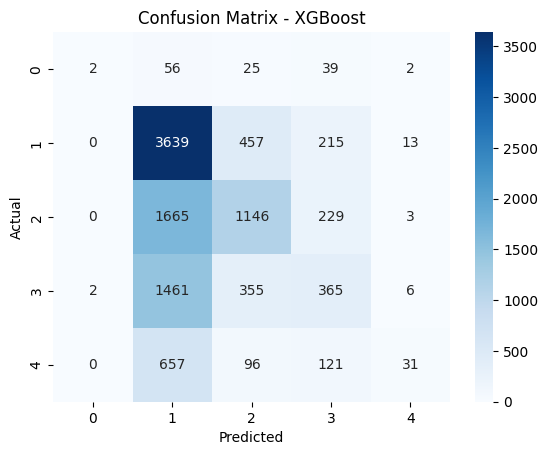

In [12]:
# confusion matrix for XGBoost
cm = confusion_matrix(y_test, y_pred_xgb)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [13]:
# dump models
joblib.dump(lr_clf, '../models/logistic_regression_model.joblib')
joblib.dump(xgb_clf, '../models/xgboost_classification_model.joblib')

['../models/xgboost_classification_model.joblib']